# Turing Reaction–Diffusion Model Simulation

**Description:** Implement Gray–Scott reaction–diffusion equations to simulate Turing patterns, analyze wavelength, and perform parameter sweeps.

**Sections:**
1. Introduction
2. Simulation
3. Wavelength estimation
4. vary $[F,k]$

## 1. Model Introduction

Turing patterns arise from interacting species $u,v$ with diffusion coefficients $D_u,D_v$ and nonlinear kinetics:
$$
\frac{\partial u}{\partial t} = D_u \nabla^2 u + f(u,v),
\quad
\frac{\partial v}{\partial t} = D_v \nabla^2 v + g(u,v).
$$
Gray–Scott kinetics:
$$
f = -u v^2 + F(1 - u),
\quad
g = u v^2 - (F + k)v.
$$

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys, os
project_root = os.path.abspath("..") 
sys.path.insert(0, project_root)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import model

## 2. Simulation

In [4]:
Nx = Ny = 256
dx = 1.0
dt = 1.0
total_steps = 10000

Du, Dv = 0.2, 0.05
F, k   = 0.04, 0.06

snapshots = [0, 2000, 5000, 8000, total_steps]

u0 = np.ones((Nx,Ny)) + 0.02*np.random.randn(Nx,Ny)
v0 = np.zeros((Nx,Ny)) + 0.02*np.random.randn(Nx,Ny)
r = 20
u0[Nx//2-r:Nx//2+r, Ny//2-r:Ny//2+r] = 0.50
v0[Nx//2-r:Nx//2+r, Ny//2-r:Ny//2+r] = 0.25


In [5]:
def f_func(u, v):
    return -u*v**2 + F*(1 - u)

def g_func(u, v):
    return  u*v**2 - (F + k)*v

In [6]:
us, vs = [], []
u, v = u0.copy(), v0.copy()
prev = 0

for t in snapshots:
    if t == 0:
        us.append(u.copy()); vs.append(v.copy())
    else:
        u, v = model.sim_turing(Du, Dv, f_func, g_func, u, v, dx, dt, t - prev)
        us.append(u.copy()); vs.append(v.copy())
    prev = t

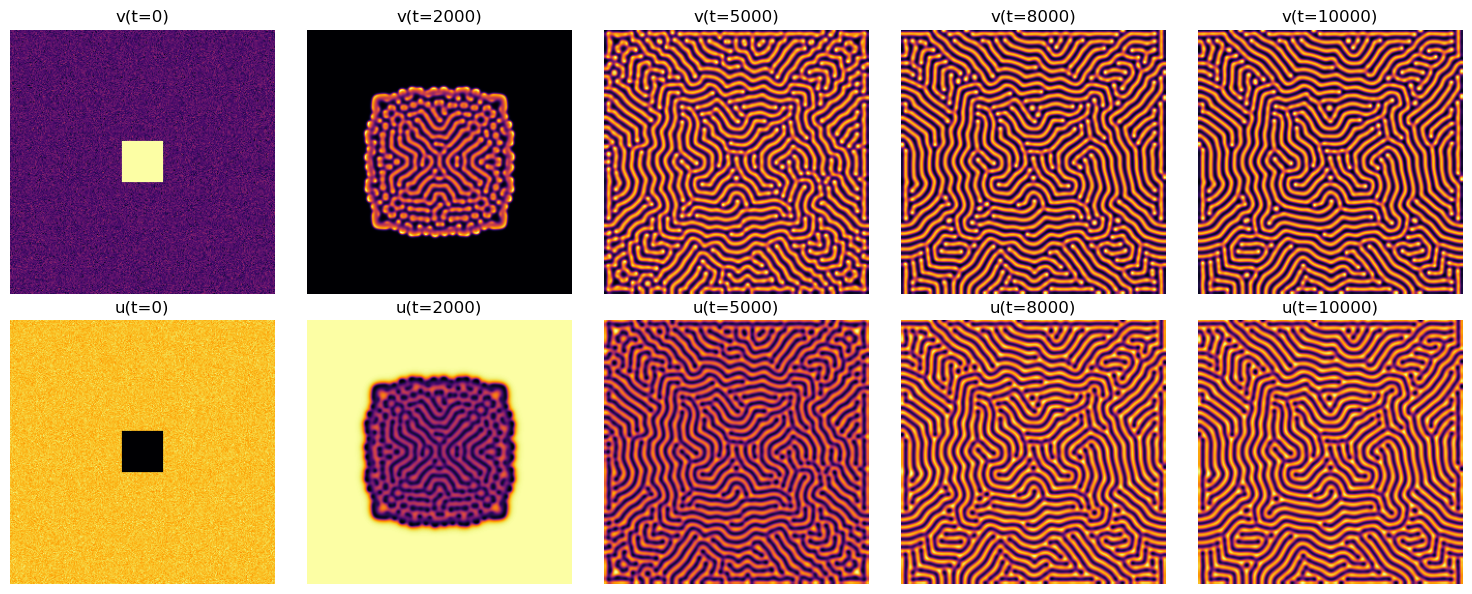

In [7]:
n = len(snapshots)
fig, axes = plt.subplots(2, n, figsize=(3*n, 6))

for i, t in enumerate(snapshots):
    ax = axes[0, i]
    im = ax.imshow(vs[i], cmap='inferno', origin='lower')
    ax.set_title(f"v(t={t})")
    ax.axis('off')
    
    ax = axes[1, i]
    ax.imshow(us[i], cmap='inferno', origin='lower')
    ax.set_title(f"u(t={t})")
    ax.axis('off')

plt.tight_layout()
plt.show()

## 3. wavelength estimation

In [8]:
w_lambda = model.estimate_wavelength(us[-1], dx)
print(f"Turing pattern wavelength: {w_lambda:.2f} units")

Turing pattern wavelength: 1.65 units


## 4. vary $[F,k]$

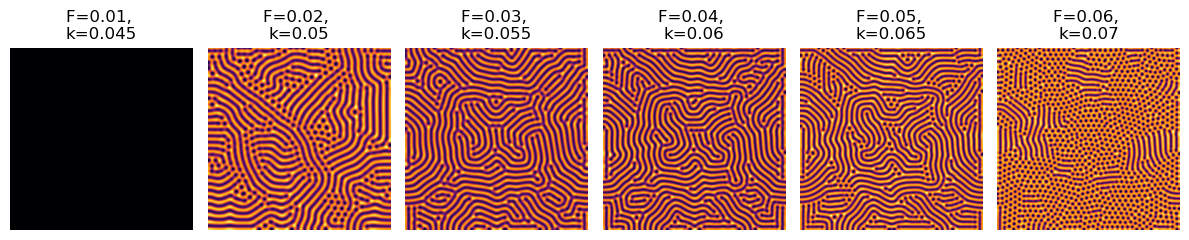

In [9]:
params = [(0.01,0.045), (0.02,0.05), (0.03,0.055), (0.04,0.06), (0.05,0.065), (0.06,0.07)]
fig, axs = plt.subplots(1,6,figsize=(12,3))
for ax,(Fv,kv) in zip(axs, params):
    u_temp, _ = model.sim_turing(Du, Dv,
                           lambda u,v: -u*v**2 + Fv*(1-u),
                           lambda u,v: u*v**2 - (Fv+kv)*v,
                           u, v, dx, dt, total_steps)
    ax.imshow(u_temp, origin='lower', cmap='inferno')
    ax.set_title(f'F={Fv}, \nk={kv}')
    ax.axis('off')
plt.tight_layout()
plt.show()